In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree

import os
os.environ['OMP_NUM_THREADS'] = '3'

In [2]:
# Load data
data = pd.read_csv("C:/Users/2111s/Music/FEYNN_LABS/FEYNN_LABS_DATASET/india_fuel_prices.csv")

In [3]:
print(data.head(5))

         city     diesel      petrol
0    Adilabad  99.84 ₹/L  111.83 ₹/L
1  Agar Malwa  94.89 ₹/L  109.70 ₹/L
2        Agra  89.80 ₹/L   96.63 ₹/L
3  Ahmadnagar  93.03 ₹/L  106.53 ₹/L
4   Ahmedabad  92.17 ₹/L   96.42 ₹/L


In [4]:
# Pre-process data: Remove ₹/L and convert to numeric
data['diesel'] = data['diesel'].str.replace(' ₹/L', '').astype(float)
data['petrol'] = data['petrol'].str.replace(' ₹/L', '').astype(float)

In [5]:
#After Removing ₹/L 
print(data.head(5))

         city  diesel  petrol
0    Adilabad   99.84  111.83
1  Agar Malwa   94.89  109.70
2        Agra   89.80   96.63
3  Ahmadnagar   93.03  106.53
4   Ahmedabad   92.17   96.42


PCA-Principle component Analysis

In [6]:
# Prepare data for PCA
data_numeric = data[['diesel', 'petrol']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


In [7]:
# Perform PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data=data_pca, columns=['Principal Component 1', 'Principal Component 2'])
print(pca_df.head())
print("Explained variance ratio:", pca.explained_variance_ratio_)


   Principal Component 1  Principal Component 2
0              -2.559408               0.122493
1              -1.419718              -0.460521
2               1.173920               0.361689
3              -0.681818              -0.369941
4               0.788957               0.801536
Explained variance ratio: [0.88732889 0.11267111]


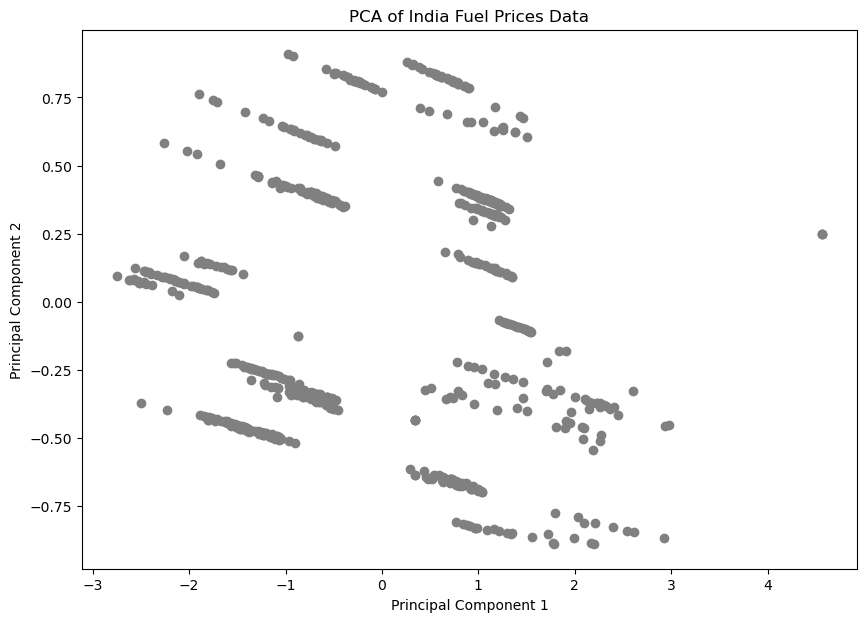

In [8]:
# Plot PCA results
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:, 0], data_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of India Fuel Prices Data')
plt.show()

K-Means Clustering

In [9]:
# KMeans clustering
best_model = None
best_score = float('inf')
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(data_scaled)
    score = kmeans.inertia_
    if score < best_score:
        best_score = score
        best_model = kmeans

cluster_labels = best_model.labels_
data['Cluster'] = cluster_labels
print(data[['city', 'Cluster']])

C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

            city  Cluster
0       Adilabad        2
1     Agar Malwa        4
2           Agra        1
3     Ahmadnagar        4
4      Ahmedabad        7
..           ...      ...
693       Yadgir        5
694  Yamunanagar        1
695        Yanam        3
696     Yavatmal        4
697    Zunheboto        5

[698 rows x 2 columns]


ELBOW METHOD FOR SEGMENTATION

C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

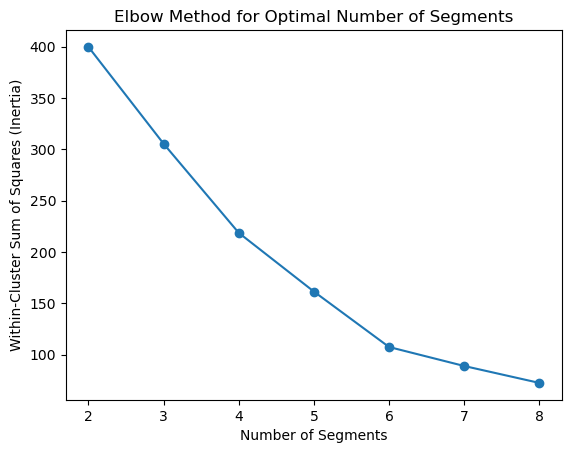

In [10]:
# Elbow method for optimal number of segments
inertia_values = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(data_scaled).inertia_ for k in range(2, 9)]
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.show()

USING REGRESSION MODELS

In [11]:
# Gaussian Mixture Models
np.random.seed(1234)
aic_values = []
bic_values = []
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(data_scaled)
    aic_values.append(gmm.aic(data_scaled))
    bic_values.append(gmm.bic(data_scaled))

optimal_k = bic_values.index(min(bic_values)) + 2
gmm_optimal = GaussianMixture(n_components=optimal_k, n_init=10, random_state=1234)
gmm_optimal.fit(data_scaled)
gmm_labels = gmm_optimal.predict(data_scaled)

kmeans_optimal = KMeans(n_clusters=optimal_k, n_init=10, random_state=1234)
kmeans_optimal.fit(data_scaled)
kmeans_labels = kmeans_optimal.labels_

contingency_table = pd.crosstab(kmeans_labels, gmm_labels)
print(contingency_table)


C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

col_0   0   1    2   3    4   5   6  7
row_0                                 
0       0   0    0   0  103   0   0  0
1       3   0  169   0    0   0   0  0
2       0   0    0  68    0   0  10  0
3      55   0    0   0    0   0   0  0
4       0  93    0   1    2   0  72  0
5      17   0    0   0    0  61   0  0
6       0   0    0   0    0   0   0  3
7       0   0   40   0    1   0   0  0


PROFILING WITH K-MEANS

C:\Users\2111s\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


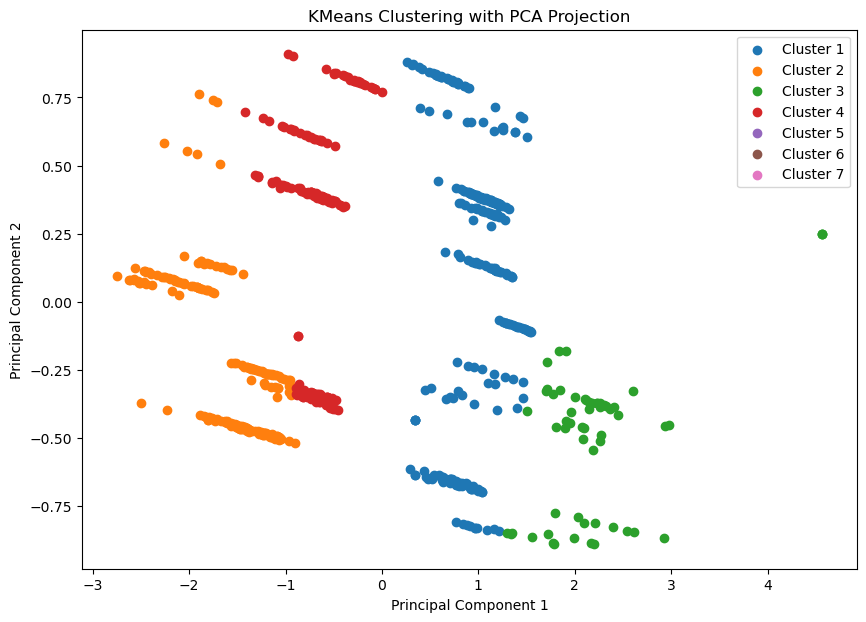

In [12]:
# Profiling segments with KMeans
np.random.seed(1234)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(10, 7))
for i in range(7):
    cluster_points = data_pca[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering with PCA Projection')
plt.legend()
plt.show()

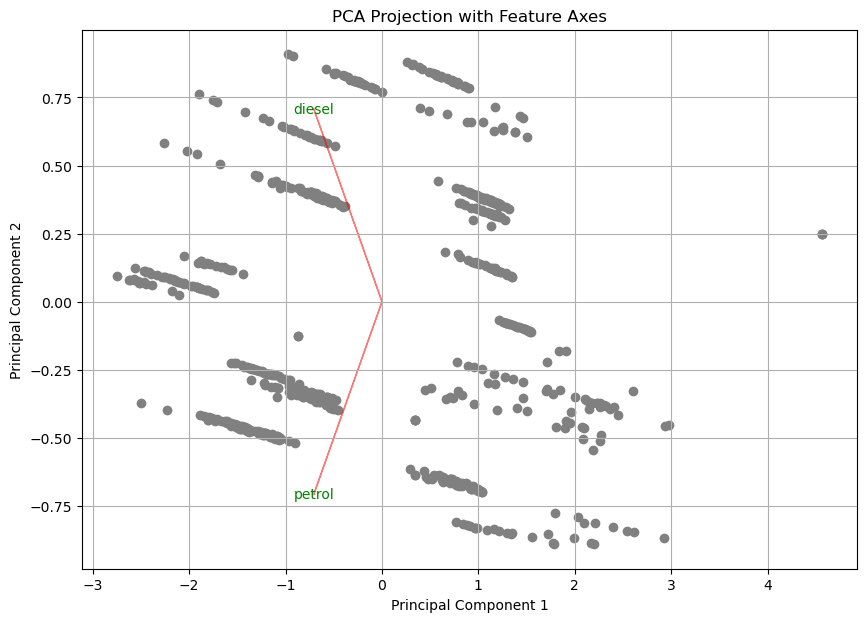

In [13]:
# Project PCA axes
def projAxes(pca_model, pca_data, original_data):
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_data[:, 0], pca_data[:, 1], color='grey')
    for i, (x, y) in enumerate(zip(pca_model.components_[0], pca_model.components_[1])):
        plt.arrow(0, 0, x, y, color='r', alpha=0.5)
        plt.text(x, y, f"{original_data.columns[i]}", color='g', ha='center', va='center')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Projection with Feature Axes')
    plt.grid()
    plt.show()

projAxes(pca, data_pca, data[['diesel', 'petrol']])

DECISION TREEE FOR CLUSTERS

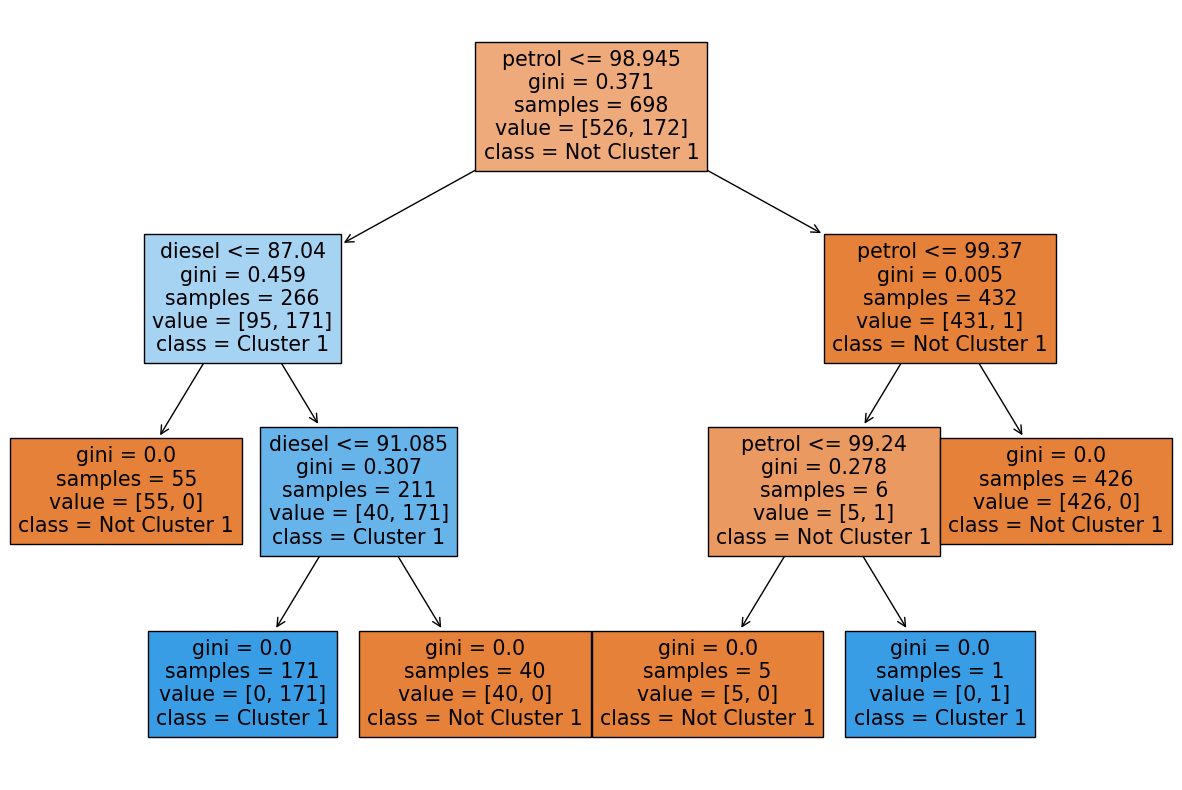

            diesel      petrol
Cluster                       
0        95.646117  103.040485
1        89.586686   97.089012
2        98.214615  110.166154
3        84.580000   96.371636
4        94.235000  108.189524
5        88.083205  101.731154
6        79.740000   84.100000
7        92.564390   97.070976


In [14]:
# Decision tree for one of the clusters
data['Cluster1'] = (data['Cluster'] == 1).astype(int)
features = ['diesel', 'petrol']
tree_model = DecisionTreeClassifier(random_state=1234)
tree_model.fit(data[features], data['Cluster1'])

plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=features, class_names=['Not Cluster 1', 'Cluster 1'], filled=True)
plt.show()

# Profiling clusters
fuel_means = data.groupby('Cluster')[['diesel', 'petrol']].mean()
print(fuel_means)

MOSAIC PLOT

<Figure size 1000x700 with 0 Axes>

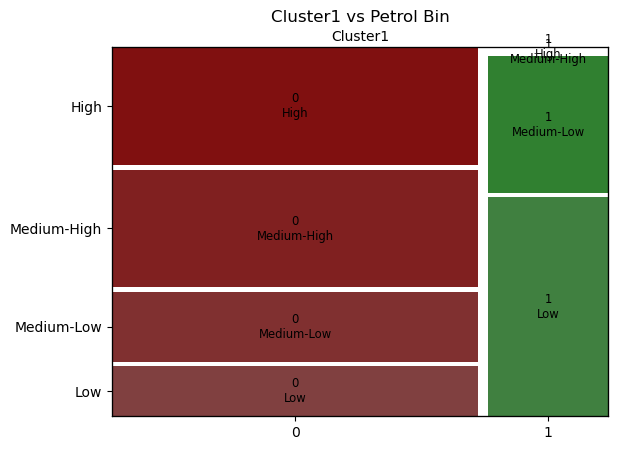

<Figure size 1000x700 with 0 Axes>

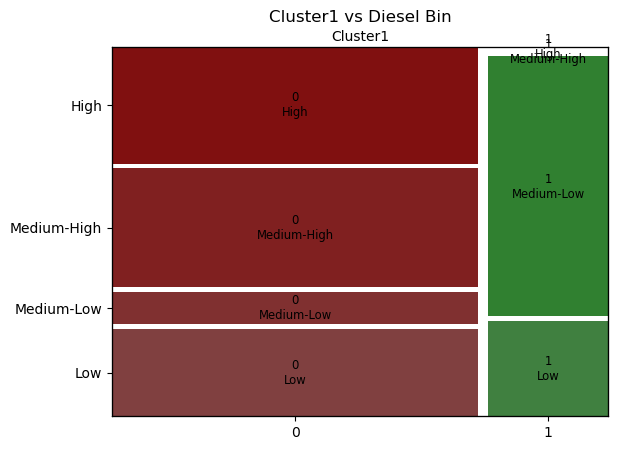

In [15]:
# Create bins for petrol and diesel prices
data['petrol_bin'] = pd.qcut(data['petrol'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
data['diesel_bin'] = pd.qcut(data['diesel'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Mosaic plot for Cluster1 vs. petrol_bin
plt.figure(figsize=(10, 7))
mosaic(data, ['Cluster1', 'petrol_bin'], title='Cluster1 vs Petrol Bin', gap=0.02)
plt.xlabel('Cluster1')
plt.ylabel('Petrol Bin')
plt.show()

# Mosaic plot for Cluster1 vs. diesel_bin
plt.figure(figsize=(10, 7))
mosaic(data, ['Cluster1', 'diesel_bin'], title='Cluster1 vs Diesel Bin', gap=0.02)
plt.xlabel('Cluster1')
plt.ylabel('Diesel Bin')
plt.show()

In [16]:
# Display the city names according to the clusters they lie in
clustered_cities = data[['city', 'Cluster']].groupby('Cluster')['city']

In [17]:
print(clustered_cities)

In [18]:
print(data)

            city  diesel  petrol  Cluster  Cluster1   petrol_bin   diesel_bin
0       Adilabad   99.84  111.83        2         0         High         High
1     Agar Malwa   94.89  109.70        4         0         High  Medium-High
2           Agra   89.80   96.63        1         1          Low   Medium-Low
3     Ahmadnagar   93.03  106.53        4         0  Medium-High  Medium-High
4      Ahmedabad   92.17   96.42        7         0          Low   Medium-Low
..           ...     ...     ...      ...       ...          ...          ...
693       Yadgir   88.25  102.31        5         0   Medium-Low          Low
694  Yamunanagar   90.11   97.26        1         1   Medium-Low   Medium-Low
695        Yanam   86.59   96.82        3         0          Low          Low
696     Yavatmal   93.80  107.29        4         0  Medium-High  Medium-High
697    Zunheboto   89.18  101.32        5         0   Medium-Low          Low

[698 rows x 7 columns]


CLUSTER PROFILING AND DISPLAYING CITIES AS PER CLUSTERS

In [19]:
# Profiling clusters
fuel_means = data.groupby('Cluster')[['diesel', 'petrol']].mean()
print(fuel_means)

# Display the city names according to the clusters they lie in
clustered_cities = data[['city', 'Cluster']].groupby('Cluster')['city'].apply(list)
for cluster, cities in clustered_cities.items():
    print(f"\nCluster {cluster}:")
    for city in cities:
        print(f" - {city}")

            diesel      petrol
Cluster                       
0        95.646117  103.040485
1        89.586686   97.089012
2        98.214615  110.166154
3        84.580000   96.371636
4        94.235000  108.189524
5        88.083205  101.731154
6        79.740000   84.100000
7        92.564390   97.070976

Cluster 0:
 - Angul
 - Ariyalur
 - Baleshwar
 - Balod
 - Balodabazar
 - Balrampur
 - Bargarh
 - Bastar
 - Bemetara
 - Bhadrak
 - Bilaspur
 - Bokaro
 - Bolangir
 - Boudh
 - Chatra
 - Chennai
 - Coimbatore
 - Cuddalore
 - Cuttack
 - Dhamtari
 - Dhanbad
 - Dharmapuri
 - Dhenkanal
 - Dindigul
 - Dumka
 - Durg
 - East Singhbhum
 - Erode
 - Gajapati
 - Ganjam
 - Garhwa
 - Gariyaband
 - Giridih
 - Godda
 - Gumla
 - Hazaribagh
 - Jagatsinghpur
 - Jajpur
 - Jamtara
 - Janjgir
 - Jashpur
 - Jharsuguda
 - Kalahandi
 - Kanchipuram
 - Kandhamal
 - Kanker
 - Kanniyakumari
 - Karur
 - Kawardha
 - Kendrapara
 - Keonjhar
 - Khordha
 - Khunti
 - Koderma
 - Kondagaon
 - Korba
 - Koria
 - Krishnagiri

EXPORTING OUTPUT/DATA into .csv file

In [20]:
clustered_cities_df = pd.DataFrame(clustered_cities.apply(list).reset_index(name='Cities'))

# Sort by cluster for better organization
clustered_cities_df.sort_values(by='Cluster', inplace=True)

# Define the file path where you want to save the CSV file
csv_file_path = "clustered_cities.csv"

# Export to CSV
clustered_cities_df.to_csv(csv_file_path, index=False)

print(f"Clustered cities data has been exported to {csv_file_path}")

Clustered cities data has been exported to clustered_cities.csv
